In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import lag_plot
from prophet import Prophet
from sklearn.metrics import r2_score
import pickle

In [2]:
data = pd.read_csv('HistoricalQuotes.csv', parse_dates = True)

In [3]:
data.rename(columns = {' Close/Last' : 'Close', ' Volume' : 'Volume', ' Open' : 'Open', ' High' : 'High', ' Low' : 'Low'}, inplace = True)

In [4]:
data = data.loc[::-1].reset_index(drop=True)

In [5]:
data.head()

,Date,Close,Volume,Open,High,Low
0,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35
1,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
3,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
4,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614


In [6]:
def convert(x):
  y = x[2:]
  return float(y)

In [7]:
data['Close'] = data['Close'].apply(convert)
data['Open'] = data['Open'].apply(convert)
data['High'] = data['High'].apply(convert)
data['Low'] = data['Low'].apply(convert)

In [8]:
data.head()

,Date,Close,Volume,Open,High,Low
0,03/01/2010,29.8557,137312041,29.3928,29.9286,29.3500
1,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771
2,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
3,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
4,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614


In [9]:
data_corr = data.corr()

<AxesSubplot:>

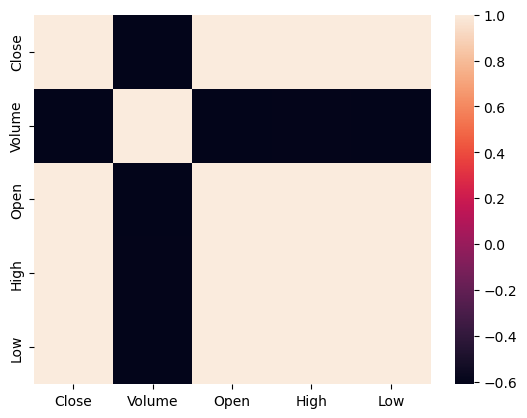

In [10]:
sns.heatmap(data_corr)

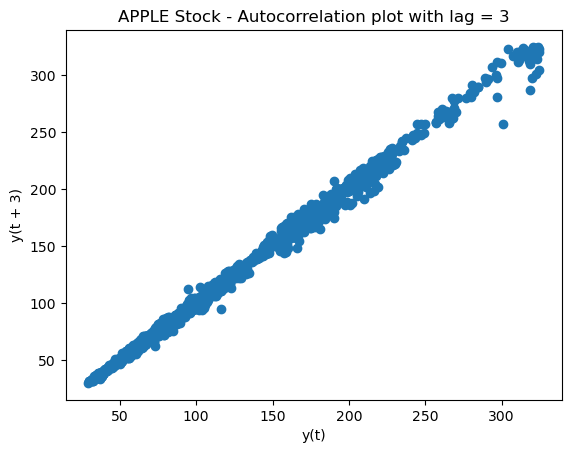

In [11]:
plt.figure()
lag_plot(data['Open'], lag=3)
plt.title('APPLE Stock - Autocorrelation plot with lag = 3')
plt.show()

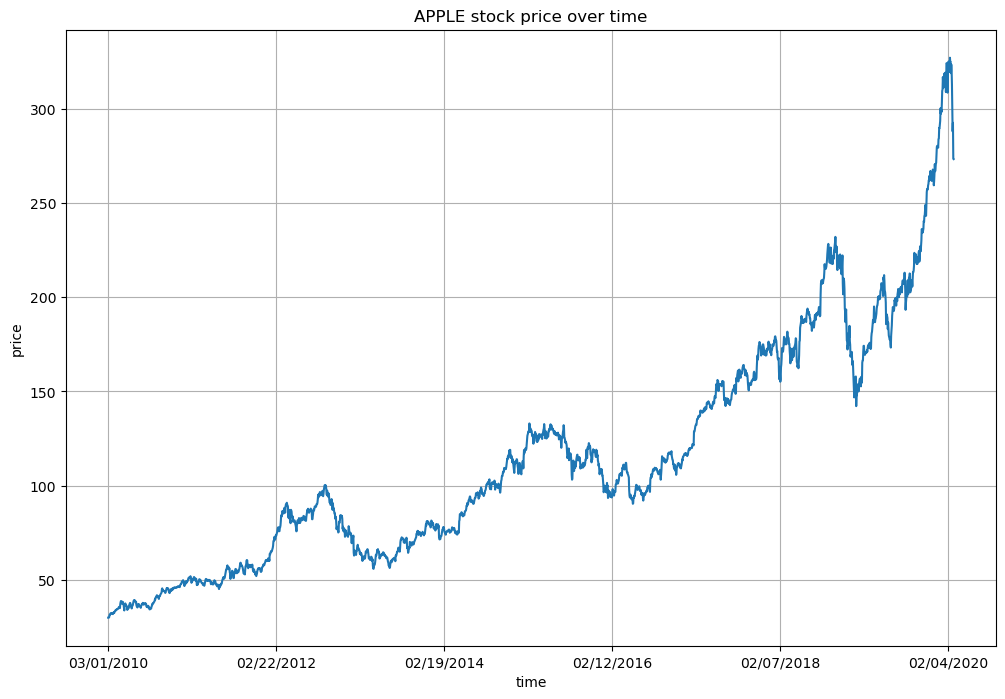

In [12]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid()
plt.plot(data["Date"], data["Close"])
plt.title("APPLE stock price over time")
plt.xlabel("time")
plt.ylabel("price")
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()

In [13]:
lens = data.shape[0]
end = int(0.8 * lens)
end

2014

In [14]:
train = data.iloc[:end]
test = data.iloc[end:]

In [15]:
train

,Date,Close,Volume,Open,High,Low
0,03/01/2010,29.8557,137312041,29.3928,29.9286,29.3500
1,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771
2,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
3,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
4,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614
...,...,...,...,...,...,...
2009,02/21/2018,171.0700,37378070,172.8300,174.1200,171.0100
2010,02/22/2018,172.5000,30953760,171.8000,173.9500,171.7100
2011,02/23/2018,175.5000,33772050,173.6700,175.6500,173.5400
2012,02/26/2018,178.9700,37353670,176.3500,179.3900,176.2100


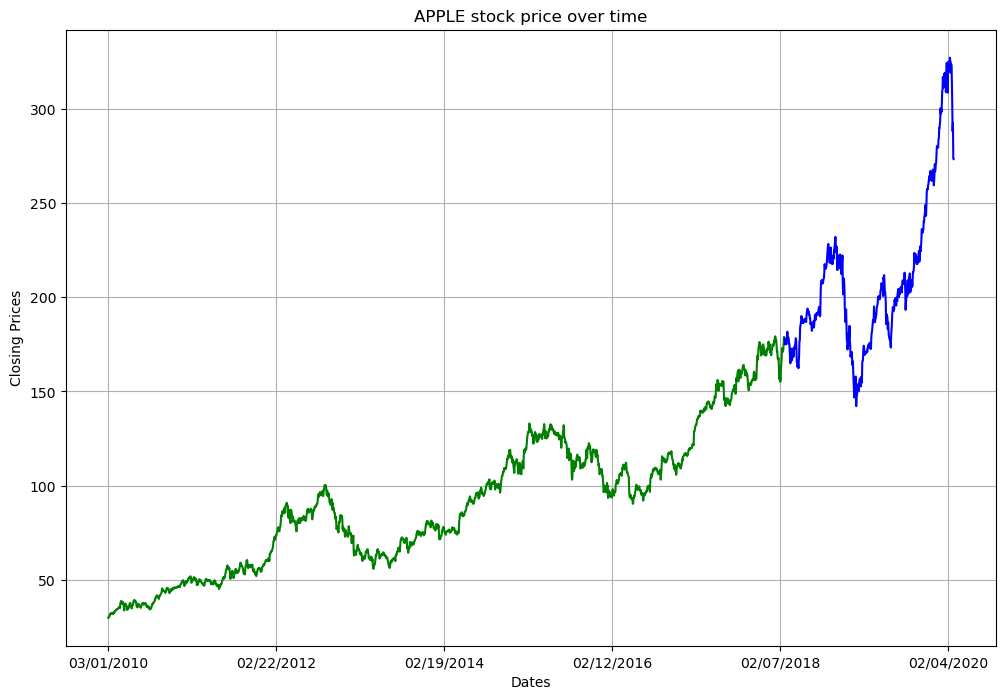

In [16]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid()
plt.title("APPLE stock price over time")
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train["Date"], train['Close'], 'green', label='Train data')
plt.plot(test["Date"], test['Close'], 'blue', label='Test data')
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()

In [17]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [18]:
stationarity(data['Close'])

Test Statistic: 0.04918130127669502
P-Value: 0.9624152269389331
Non-Stationary


In [19]:
data['First_Order_Difference'] = data['Close'] - data['Close'].shift(1)
data['Second_Order_Difference'] = data['First_Order_Difference'] - data['First_Order_Difference'].shift(1)

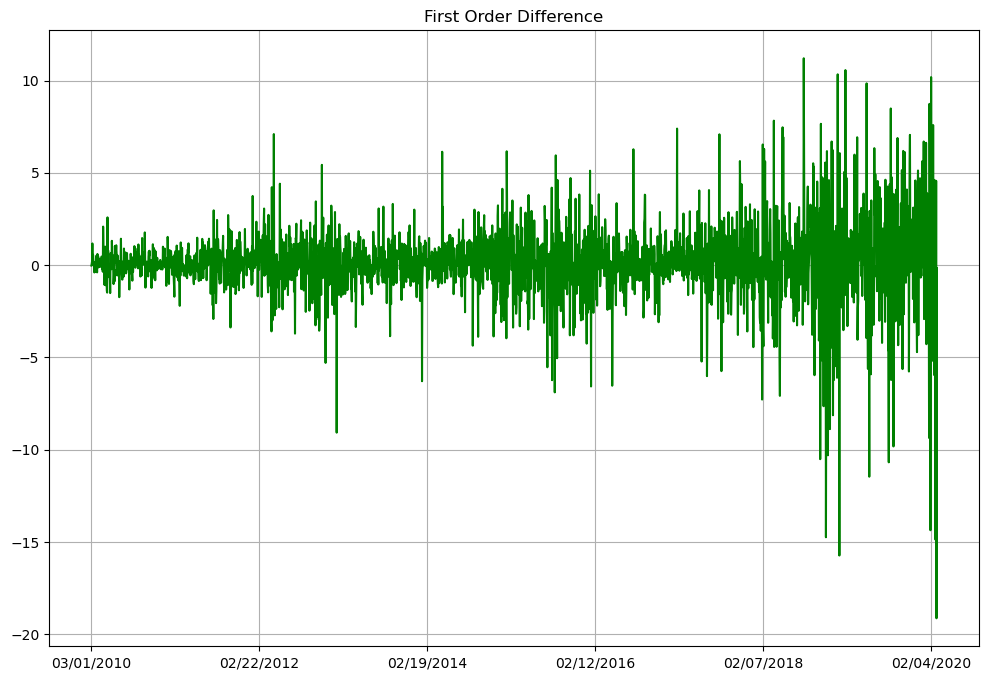

In [20]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid()
plt.title("First Order Difference")
plt.plot(data["Date"], data['First_Order_Difference'], 'green', label='Train data')
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()

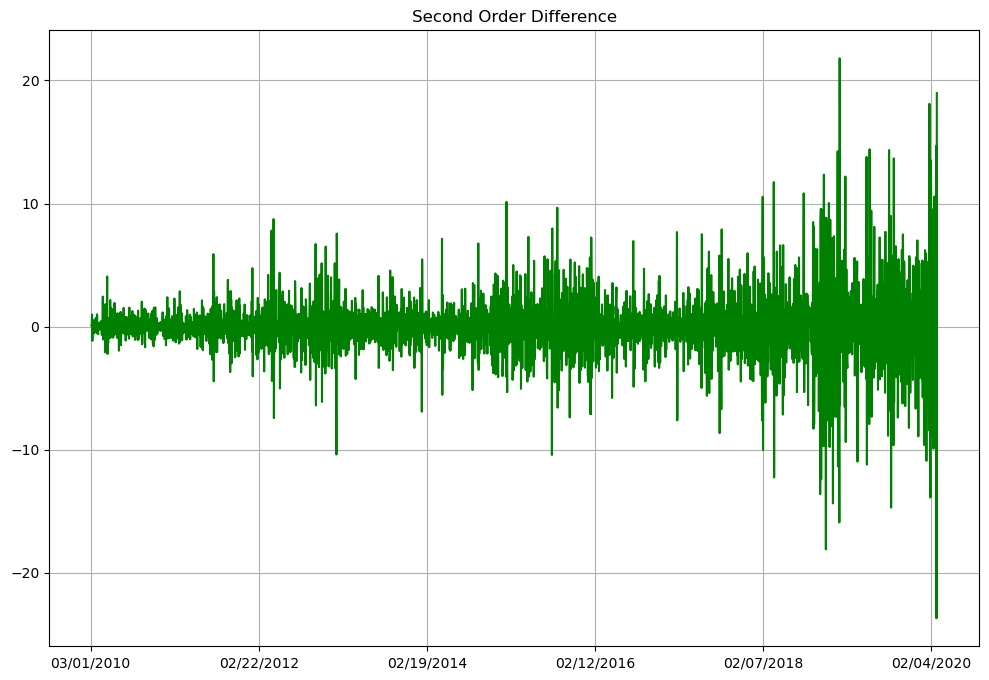

In [21]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid()
plt.title("Second Order Difference")
plt.plot(data["Date"], data['Second_Order_Difference'], 'green', label='Train data')
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\ppamr\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


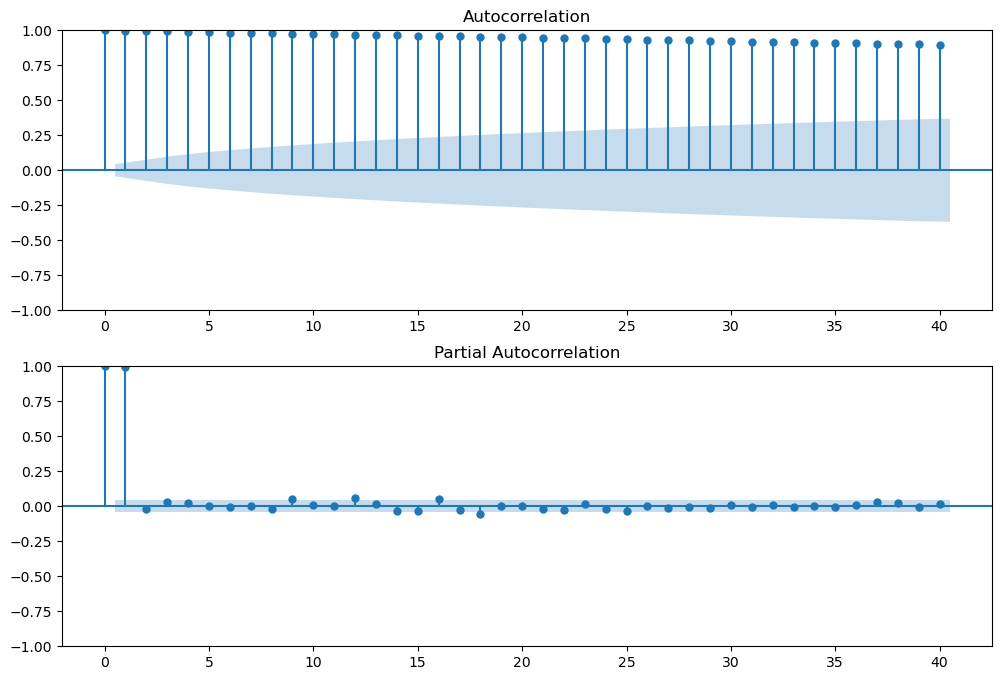

In [23]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Close'], lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Close'], lags=40, ax=ax2)

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model = ARIMA(train['Close'], order=(5, 1, 0))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2014
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3588.880
Date:                Thu, 25 May 2023   AIC                           7189.761
Time:                        11:12:28   BIC                           7223.405
Sample:                             0   HQIC                          7202.110
                               - 2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0358      0.017      2.143      0.032       0.003       0.069
ar.L2         -0.0358      0.018     -1.961      0.050      -0.072   -1.77e-05
ar.L3         -0.0046      0.017     -0.264      0.7

In [26]:
pred = model.forecast(steps=len(test))

In [27]:
history = [x for x in train['Close']]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model = model.fit()
    output = model.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test['Close'][t + 2014]
    history.append(obs)

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(predictions, test['Close'])

0.9920797887422792

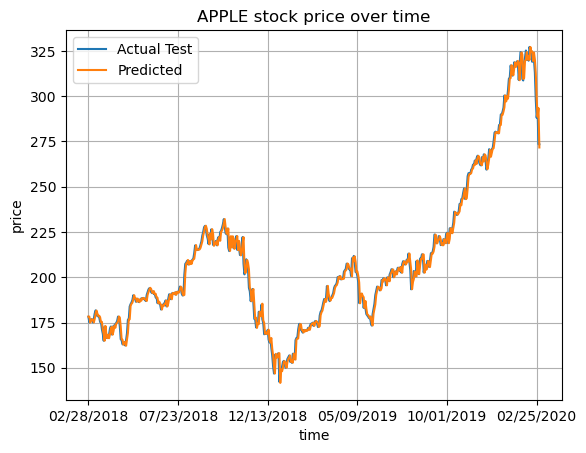

In [30]:
fig, ax = plt.subplots()
ax.grid()
plt.plot(test["Date"], test['Close'], label="Actual Test")
plt.plot(test["Date"], predictions, label="Predicted")
plt.title("APPLE stock price over time")
plt.xlabel("time")
plt.ylabel("price")
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.legend()
plt.show()

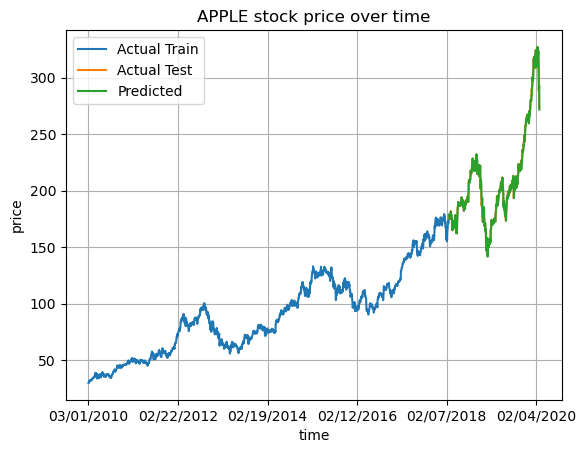

In [31]:
fig, ax = plt.subplots()
ax.grid()
plt.plot(train["Date"], train['Close'], label="Actual Train")
plt.plot(test["Date"], test['Close'], label="Actual Test")
plt.plot(test["Date"], predictions, label="Predicted")
plt.title("APPLE stock price over time")
plt.xlabel("time")
plt.ylabel("price")
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.legend()
plt.show()

In [32]:
filename = 'model_pickle_apple_arima.sav'
pickle.dump(model, open(filename, 'wb'))

In [33]:
import pickle
filename = 'model_pickle_apple_arima.sav'
model = pickle.load(open(filename, 'rb'))

# Forecast

In [34]:
history = [x for x in data['Close']]
forecasts = []
for t in range(10):
    model = ARIMA(history, order=(5, 1, 0))
    model = model.fit()
    output = model.forecast()
    pred = output[0]
    forecasts.append(pred)
    obs = round(pred)
    history.append(obs)

In [35]:
forecasts

[272.4726299079311,
 272.3059012504336,
 270.76379525646576,
 270.15791640163314,
 269.90298392406527,
 269.99275091279344,
 269.9436603494064,
 269.87865156696364,
 269.95578154660154,
 270.0]

In [36]:
newindex = [i for i in range(test.index[-1], test.index[-1] + 10)]

In [37]:
test.index[-1]

2517

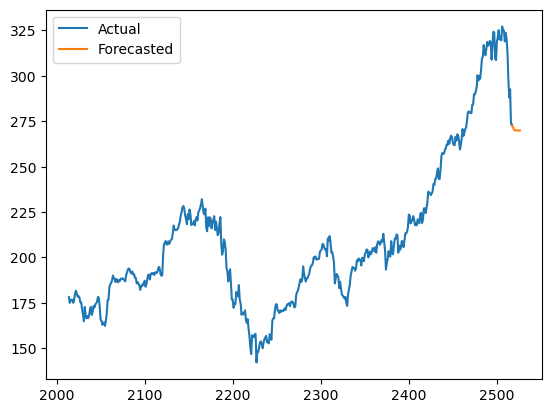

In [38]:
plt.plot(test['Close'], label="Actual")
plt.plot(newindex, forecasts, label="Forecasted")
plt.legend()

In [39]:
pred = model.predict(start = len(data), end = len(data)+9, typ = 'levels')

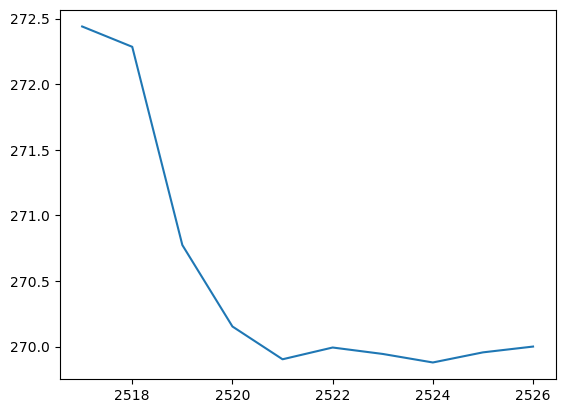

In [40]:
plt.plot(newindex, pred, label="Forecasted")